In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math

In [2]:
df=pd.read_csv('covid_19_india.csv')
df

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3
...,...,...,...,...,...,...,...,...,...
1152,1153,20/04/20,5:00 PM,Telengana,-,-,190,21,873
1153,1154,20/04/20,5:00 PM,Tripura,-,-,1,0,2
1154,1155,20/04/20,5:00 PM,Uttarakhand,-,-,11,0,44
1155,1156,20/04/20,5:00 PM,Uttar Pradesh,-,-,129,17,1176


In [3]:
df['Active']=df['Confirmed']-df['Cured']-df['Deaths']
df['State']=df['State/UnionTerritory']
df=df.drop(['Sno','Time','State/UnionTerritory','ConfirmedIndianNational','ConfirmedForeignNational'],axis='columns')
df=df[['Date','State','Confirmed','Cured','Deaths','Active']]
df

,Date,State,Confirmed,Cured,Deaths,Active
0,30/01/20,Kerala,1,0,0,1
1,31/01/20,Kerala,1,0,0,1
2,01/02/20,Kerala,2,0,0,2
3,02/02/20,Kerala,3,0,0,3
4,03/02/20,Kerala,3,0,0,3
...,...,...,...,...,...,...
1152,20/04/20,Telengana,873,190,21,662
1153,20/04/20,Tripura,2,1,0,1
1154,20/04/20,Uttarakhand,44,11,0,33
1155,20/04/20,Uttar Pradesh,1176,129,17,1030


In [4]:
lastdate=str(df.Date[-1:])
lastdate=lastdate[7:15]

In [5]:
bardata=df[['Date','State','Confirmed','Cured','Deaths','Active']][df.Date==lastdate]
bardata=bardata.sort_values(by=['Active'])
bardata

,Date,State,Confirmed,Cured,Deaths,Active


In [6]:
sdt=df[df.State=="Tamil Nadu"]
sdt

,Date,State,Confirmed,Cured,Deaths,Active
61,07/03/20,Tamil Nadu,1,0,0,1
67,08/03/20,Tamil Nadu,1,0,0,1
79,09/03/20,Tamil Nadu,1,0,0,1
94,10/03/20,Tamil Nadu,1,0,0,1
105,11/03/20,Tamil Nadu,1,0,0,1
116,12/03/20,Tamil Nadu,1,0,0,1
129,13/03/20,Tamil Nadu,1,0,0,1
142,14/03/20,Tamil Nadu,1,0,0,1
156,15/03/20,Tamil Nadu,1,0,0,1
171,16/03/20,Tamil Nadu,1,0,0,1


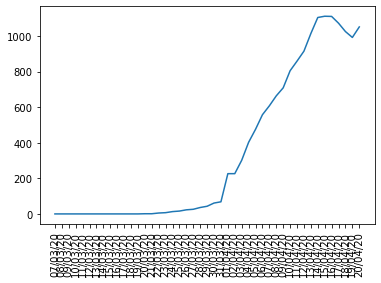

In [7]:
plt.plot(sdt['Date'],sdt['Active'])
plt.xticks(rotation=90)
plt.show()

In [8]:
gfs=[int(y)/(x) for x,y in zip(sdt['Active'][0:-1],sdt['Active'][1:])]
gfs

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 2.0,
 1.0,
 3.0,
 1.3333333333333333,
 1.75,
 1.2142857142857142,
 1.411764705882353,
 1.125,
 1.3703703703703705,
 1.1891891891891893,
 1.4090909090909092,
 1.1129032258064515,
 3.289855072463768,
 1.0,
 1.330396475770925,
 1.3344370860927153,
 1.1811414392059554,
 1.1722689075630253,
 1.0896057347670252,
 1.0921052631578947,
 1.0677710843373494,
 1.1354019746121298,
 1.067080745341615,
 1.0651920838183935,
 1.1081967213114754,
 1.0887573964497042,
 1.006340579710145,
 0.9990999099909991,
 0.9657657657657658,
 0.9561567164179104,
 0.9678048780487805,
 1.059475806451613]

In [9]:
meanGF=sum(gfs)/len(gfs)
meanGF

1.2248361611189889

In [10]:
y=(sdt['Active'].tail(1))*(meanGF**1)
y

1151    1287.302805
Name: Active, dtype: float64

In [20]:
bardata['Active'][:1]

Series([], Name: Active, dtype: int64)

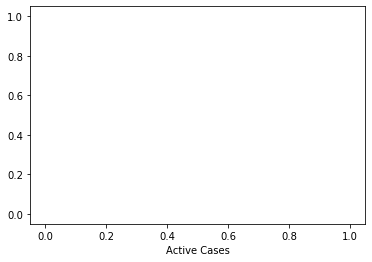

In [21]:
plt.barh(bardata['State'],bardata['Active'])
plt.xlabel('Active Cases')
plt.show()

In [23]:
df

,Date,State,Confirmed,Cured,Deaths,Active
0,30/01/20,Kerala,1,0,0,1
1,31/01/20,Kerala,1,0,0,1
2,01/02/20,Kerala,2,0,0,2
3,02/02/20,Kerala,3,0,0,3
4,03/02/20,Kerala,3,0,0,3
...,...,...,...,...,...,...
1152,20/04/20,Telengana,873,190,21,662
1153,20/04/20,Tripura,2,1,0,1
1154,20/04/20,Uttarakhand,44,11,0,33
1155,20/04/20,Uttar Pradesh,1176,129,17,1030


<BarContainer object of 1157 artists>

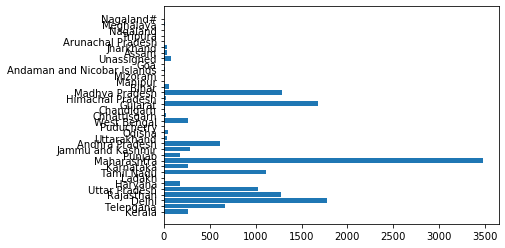

In [24]:
plt.barh(df['State'],df['Active'])